In [1]:
%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

In [2]:
# Train datasets
original_train = pd.read_csv('../datasets/covertype_train.csv')
original_norm_train = pd.read_csv('../datasets/covertype_norm_train.csv')
lda_train = pd.read_csv('../datasets/covertype_lda_train_raw.csv')
lda_norm_train = pd.read_csv('../datasets/covertype_lda_train.csv')

# Targets
target_original_train = original_train.iloc[:,-1]
target_original_norm_train = original_norm_train.iloc[:,-1]
target_lda_train = lda_train.iloc[:,-1]
target_lda_norm_train = lda_norm_train.iloc[:,-1]

# Dataset without classes
data_original_train = original_train.iloc[:,:-1]
data_original_norm_train = original_norm_train.iloc[:,:-1]
data_lda_train = lda_train.iloc[:,:-1]
data_lda_norm_train = lda_norm_train.iloc[:,:-1]

In [3]:
# Test datasets
original_test = pd.read_csv('../datasets/covertype_test.csv')
original_norm_test = pd.read_csv('../datasets/covertype_norm_test.csv')
lda_test = pd.read_csv('../datasets/covertype_lda_test_raw.csv')

# Targets
target_original_test = original_test.iloc[:,-1]
target_original_norm_test = original_norm_test.iloc[:,-1]
target_lda_test = lda_test.iloc[:,-1]

# Dataset without classes
data_original_test = original_test.iloc[:,:-1]
data_original_norm_test = original_norm_test.iloc[:,:-1]
data_lda_test = lda_test.iloc[:,:-1]

In [69]:
def perform_mlp(train, test, title):
    '''
    Performs mlp for a given dataset.
    '''
    
    train_target = train['cover_type']
    train_data   = train.loc[:, train.columns != 'cover_type']
    test_target  = test['cover_type']
    test_data    = test.loc[:, test.columns != 'cover_type']
    
    momentum = 0.8
    max_iter = [100, 1000, 10000]
    learning_rates = [0.9, 0.09, 0.009]
    start_n_neurons = (len(train.columns.tolist()) - 1 + 7) // 2
    n_neurons = [start_n_neurons, round(start_n_neurons * 1.5), round(start_n_neurons * 2)]
    
    r = pd.DataFrame(columns=['neurons', 'rate', 'iteration', 'error', 'accuracy'])
    index = 0
    for neuron in n_neurons:
        for rate in learning_rates:
            for it in max_iter:
                print('[INFO]...max_iter=', it, ',learning_rate=', rate, ',n_neurons=', neuron)
                mlp = MLPClassifier(random_state=0,
                                    momentum=momentum,
                                    max_iter=it,
                                    learning_rate_init=rate,
                                    hidden_layer_sizes=(neuron,1))
                result = cross_validate(mlp, train_data, train_target, cv=2, scoring=('accuracy', 'neg_mean_absolute_error'), return_estimator=True, return_train_score=True)                
                acc_best = 0
                error_train = -9999999
                error_cross = -9999999
                best_estimator = result['estimator'][0]
                for i in range(len(result['estimator'])):
                    score = result['estimator'][i].score(test_data, test_target)
                    if error_train < result['train_neg_mean_absolute_error'][i]:
                        acc_best = score
                        best_estimator = result['estimator'][i]
                        error_train = result['train_neg_mean_absolute_error'][i]
                
                r.loc[index] = [  neuron, rate, it, error_train, acc_best]
                index += 1
    return r

In [70]:
result_original = perform_mlp(original_train, original_test, 'Original')

[INFO]...max_iter= 100 ,learning_rate= 0.9 ,n_neurons= 30
[INFO]...max_iter= 1000 ,learning_rate= 0.9 ,n_neurons= 30
[INFO]...max_iter= 10000 ,learning_rate= 0.9 ,n_neurons= 30
[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 30
[INFO]...max_iter= 1000 ,learning_rate= 0.09 ,n_neurons= 30
[INFO]...max_iter= 10000 ,learning_rate= 0.09 ,n_neurons= 30
[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 30
[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 30
[INFO]...max_iter= 10000 ,learning_rate= 0.009 ,n_neurons= 30
[INFO]...max_iter= 100 ,learning_rate= 0.9 ,n_neurons= 45
[INFO]...max_iter= 1000 ,learning_rate= 0.9 ,n_neurons= 45
[INFO]...max_iter= 10000 ,learning_rate= 0.9 ,n_neurons= 45
[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 45
[INFO]...max_iter= 1000 ,learning_rate= 0.09 ,n_neurons= 45
[INFO]...max_iter= 10000 ,learning_rate= 0.09 ,n_neurons= 45
[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 45
[INFO]...max_iter= 1000 ,learning_rate= 0.0

In [71]:
result_original_norm = perform_mlp(original_norm_train, original_norm_test, 'Normalized original')

[INFO]...max_iter= 100 ,learning_rate= 0.9 ,n_neurons= 30
[INFO]...max_iter= 1000 ,learning_rate= 0.9 ,n_neurons= 30
[INFO]...max_iter= 10000 ,learning_rate= 0.9 ,n_neurons= 30
[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 30
[INFO]...max_iter= 1000 ,learning_rate= 0.09 ,n_neurons= 30
[INFO]...max_iter= 10000 ,learning_rate= 0.09 ,n_neurons= 30
[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 30
[INFO]...max_iter= 10000 ,learning_rate= 0.009 ,n_neurons= 30
[INFO]...max_iter= 100 ,learning_rate= 0.9 ,n_neurons= 45
[INFO]...max_iter= 1000 ,learning_rate= 0.9 ,n_neurons= 45
[INFO]...max_iter= 10000 ,learning_rate= 0.9 ,n_neurons= 45
[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 45
[INFO]...max_iter= 1000 ,learning_rate= 0.09 ,n_neurons= 45
[INFO]...max_iter= 10000 ,learning_rate= 0.09 ,n_neurons= 45
[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 45
[INFO]...max_iter= 10000 ,learning_rate= 0.009 ,n_neurons= 45
[INFO]...max_iter= 100 ,learning_rate= 0.9 ,n_neurons= 60
[INFO]...max_iter= 1000 ,learning_rate= 0.9 ,n_neurons= 60
[INFO]...max_iter= 10000 ,learning_rate= 0.9 ,n_neurons= 60
[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 60
[INFO]...max_iter= 1000 ,learning_rate= 0.09 ,n_neurons= 60
[INFO]...max_iter= 10000 ,learning_rate= 0.09 ,n_neurons= 60
[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 60
[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 60
[INFO]...max_iter= 10000 ,learning_rate= 0.009 ,n_neurons= 60


In [72]:
result_lda = perform_mlp(lda_train, lda_test, 'LDA')

[INFO]...max_iter= 100 ,learning_rate= 0.9 ,n_neurons= 6
[INFO]...max_iter= 1000 ,learning_rate= 0.9 ,n_neurons= 6
[INFO]...max_iter= 10000 ,learning_rate= 0.9 ,n_neurons= 6
[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 6
[INFO]...max_iter= 1000 ,learning_rate= 0.09 ,n_neurons= 6
[INFO]...max_iter= 10000 ,learning_rate= 0.09 ,n_neurons= 6
[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 6


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 6
[INFO]...max_iter= 10000 ,learning_rate= 0.009 ,n_neurons= 6
[INFO]...max_iter= 100 ,learning_rate= 0.9 ,n_neurons= 9
[INFO]...max_iter= 1000 ,learning_rate= 0.9 ,n_neurons= 9
[INFO]...max_iter= 10000 ,learning_rate= 0.9 ,n_neurons= 9
[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 9
[INFO]...max_iter= 1000 ,learning_rate= 0.09 ,n_neurons= 9
[INFO]...max_iter= 10000 ,learning_rate= 0.09 ,n_neurons= 9
[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 9


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 9
[INFO]...max_iter= 10000 ,learning_rate= 0.009 ,n_neurons= 9
[INFO]...max_iter= 100 ,learning_rate= 0.9 ,n_neurons= 12
[INFO]...max_iter= 1000 ,learning_rate= 0.9 ,n_neurons= 12
[INFO]...max_iter= 10000 ,learning_rate= 0.9 ,n_neurons= 12
[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 12
[INFO]...max_iter= 1000 ,learning_rate= 0.09 ,n_neurons= 12
[INFO]...max_iter= 10000 ,learning_rate= 0.09 ,n_neurons= 12
[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 12


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 12
[INFO]...max_iter= 10000 ,learning_rate= 0.009 ,n_neurons= 12


In [73]:
print("Original: \n", result_original )
print("Original norm: \n", result_original_norm)
print("LDA: \n", result_lda)

Original: 
     neurons   rate  iteration     error  accuracy
0      30.0  0.900      100.0 -1.714464  0.142887
1      30.0  0.900     1000.0 -1.714464  0.142887
2      30.0  0.900    10000.0 -1.714464  0.142887
3      30.0  0.090      100.0 -1.714286  0.142887
4      30.0  0.090     1000.0 -1.714286  0.142887
5      30.0  0.090    10000.0 -1.714286  0.142887
6      30.0  0.009      100.0 -2.286091  0.142887
7      30.0  0.009     1000.0 -2.286091  0.142887
8      30.0  0.009    10000.0 -2.286091  0.142887
9      45.0  0.900      100.0 -1.857163  0.142887
10     45.0  0.900     1000.0 -1.857163  0.142887
11     45.0  0.900    10000.0 -1.857163  0.142887
12     45.0  0.090      100.0 -2.999584  0.142679
13     45.0  0.090     1000.0 -2.999584  0.142679
14     45.0  0.090    10000.0 -2.999584  0.142679
15     45.0  0.009      100.0 -1.857163  0.142887
16     45.0  0.009     1000.0 -1.857163  0.142887
17     45.0  0.009    10000.0 -1.857163  0.142887
18     60.0  0.900      100.0 -1.85714

In [74]:
result_original.sort_values(['error', 'accuracy', 'rate', 'iteration', 'neurons'], ascending=[False, False, True, True, True],inplace=True)
result_original_norm.sort_values(['error', 'accuracy', 'rate', 'iteration', 'neurons'], ascending=[False, False, True, True, True],inplace=True)
result_lda.sort_values(['error', 'accuracy', 'rate', 'iteration', 'neurons'], ascending=[False, False, True, True, True],inplace=True)

result_original = result_original.reset_index(drop=True)
result_original_norm = result_original_norm.reset_index(drop=True)
result_lda = result_lda.reset_index(drop=True)

best_original = result_original.iloc[0,:]
best_original_norm = result_original_norm.iloc[0,:]
best_lda = result_lda.iloc[0,:]

In [75]:
print("Original: \n", best_original )
print("Original norm: \n", best_original_norm)
print("LDA: \n", best_lda)

Original: 
 neurons       30.000000
rate           0.090000
iteration    100.000000
error         -1.714286
accuracy       0.142887
Name: 0, dtype: float64
Original norm: 
 neurons        30.000000
rate            0.009000
iteration    1000.000000
error          -0.677809
accuracy        0.705907
Name: 0, dtype: float64
LDA: 
 neurons         9.000000
rate            0.009000
iteration    1000.000000
error          -0.896810
accuracy        0.653078
Name: 0, dtype: float64


In [92]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='sklearn')

def perform_mlp_10k(train, test, values, title):
    '''
    Performs mlp for a given dataset.
    '''
    
    train_target = train['cover_type']
    train_data   = train.loc[:, train.columns != 'cover_type']
    test_target  = test['cover_type']
    test_data    = test.loc[:, test.columns != 'cover_type']
    
    momentum = 0.8
    
    train_scores = []
    test_scores = []
    
    scores = []
    
    r = []
    f = plt.figure(figsize=(15,2))
    f.subplots_adjust(hspace=0.5, wspace=0.5)
    for i in range(5):
        print('[INFO]...max_iter=', int(values['iteration']), ',learning_rate=', values['rate'], ',n_neurons=', int(values['neurons']))
        mlp = MLPClassifier(momentum=momentum,
                            max_iter=int(values['iteration']),
                            learning_rate_init=values['rate'],
                            hidden_layer_sizes=(int(values['neurons']),1))
        result = cross_validate(mlp, train_data, train_target, cv=10, return_estimator=True, return_train_score=True)
        acc_best = 0
        best_estimator = result['estimator'][0]
        
        train_scores.append(result['train_score'])
        test_scores.append(result['test_score'])
        
        ax = f.add_subplot(i+151)
        ax.plot(range(1,11), result['train_score'], 'o-', color="r",
             label="Training score")
        ax.plot(range(1,11), result['test_score'], 'o-', color="g",
             label="Cross-validation score")
        ax.grid()
        
        s_ = []
        for estimator in result['estimator']:
            score = estimator.score(test_data, test_target)
            s_.append(score)
            if score > acc_best:
                acc_best = score
                best_estimator = estimator
        scores.append(s_)
        r.append(acc_best)
    
    plt.show()
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(title + ' - (max iterations: ' + str(int(values['iteration'])) + ', learning rate: ' + str(values['rate']) + ', nº neurons: ' + str(int(values['neurons'])))
    plt.xlabel("Split")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(range(1,6), train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(range(1,6), test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(range(1,6), train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(range(1,6), test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()
    
    print("Mean: ", [ np.mean(i) for i in scores ])
    print("Std: ", [ np.std(i) for i in scores ])
    
    return r

[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 30
[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 30
[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 30
[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 30
[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 30


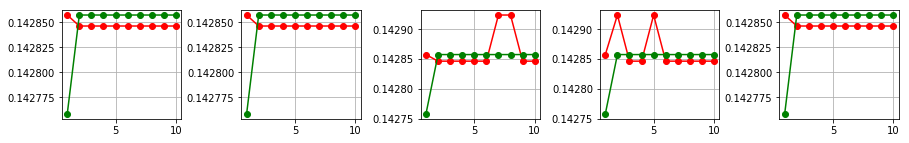

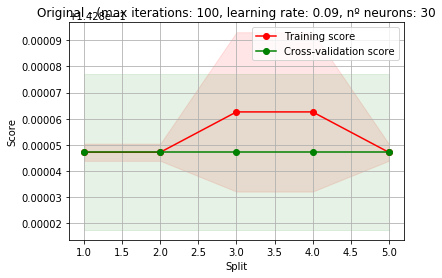

Mean:  [0.14288685524126457, 0.14288685524126457, 0.14284525790349417, 0.14284525790349417, 0.14288685524126457]
Std:  [0.0, 0.0, 8.319467554076533e-05, 8.319467554076533e-05, 0.0]


In [93]:
result_original_10k = perform_mlp_10k(original_train, original_test , best_original, 'Original')

[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 30
[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 30
[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 30
[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 30
[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 30


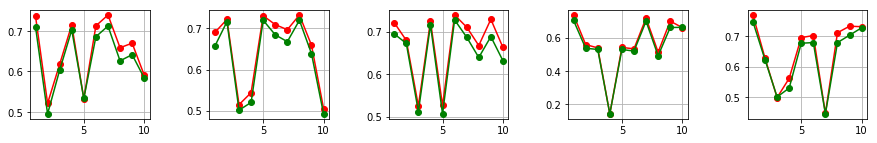

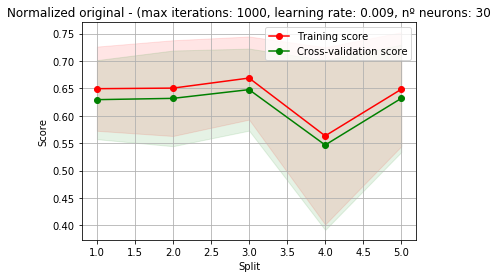

Mean:  [0.633257071547421, 0.6362312811980033, 0.6543677204658901, 0.5522254575707154, 0.6348169717138104]
Std:  [0.07381406564224863, 0.08579126954000571, 0.06987162910752989, 0.15679474760199538, 0.1009392122049862]


In [94]:
result_original_norm_10k = perform_mlp_10k(original_norm_train, original_norm_test , best_original_norm, 'Normalized original')

[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 9
[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 9
[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 9
[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 9
[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 9


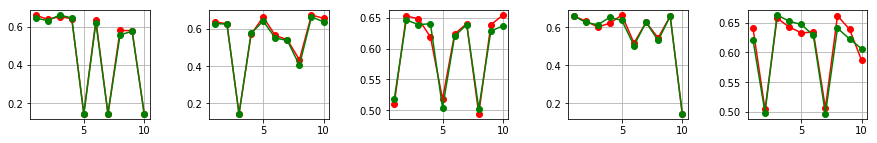

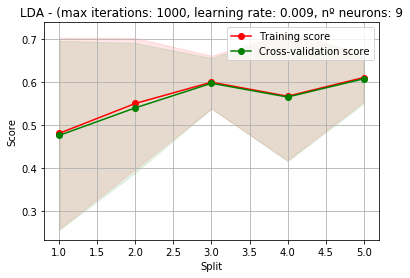

Mean:  [0.4788685524126456, 0.5473377703826954, 0.5985648918469219, 0.5617512479201331, 0.6070299500831947]
Std:  [0.22150508541978184, 0.14998272445906494, 0.06392642340853491, 0.1480907128092474, 0.059100082802993024]


In [95]:
result_lda_10k = perform_mlp_10k(lda_train, lda_test, best_lda, 'LDA')

In [96]:
print("Original: ", result_original_10k )
print("Original norm: ", result_original_norm_10k)
print("LDA: ", result_lda_10k)

Original:  [0.14288685524126457, 0.14288685524126457, 0.14288685524126457, 0.14288685524126457, 0.14288685524126457]
Original norm:  [0.7206738768718802, 0.7271214642262895, 0.7221297836938436, 0.7102745424292846, 0.7502079866888519]
LDA:  [0.6564059900166389, 0.6630615640599001, 0.6591098169717138, 0.6582778702163061, 0.6576539101497504]
